In [444]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [445]:
data = pd.read_csv("results.csv")
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [446]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40619 entries, 0 to 40618
Data columns (total 9 columns):
date          40619 non-null object
home_team     40619 non-null object
away_team     40619 non-null object
home_score    40619 non-null int64
away_score    40619 non-null int64
tournament    40619 non-null object
city          40619 non-null object
country       40619 non-null object
neutral       40619 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


### 1. Number of game days

In [447]:
data["date"] = pd.to_datetime(data["date"])
data["date_month"] = data["date"].dt.month
data["date_month"].value_counts().sort_index()

1     2203
2     2563
3     4016
4     2526
5     3229
6     5846
7     2694
8     2702
9     4070
10    4434
11    4077
12    2259
Name: date_month, dtype: int64

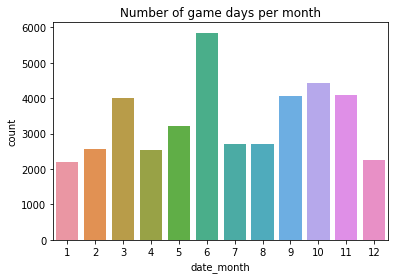

In [448]:
plt.title("Number of game days per month")
sns.countplot(data=data,x="date_month" )
plt.show()

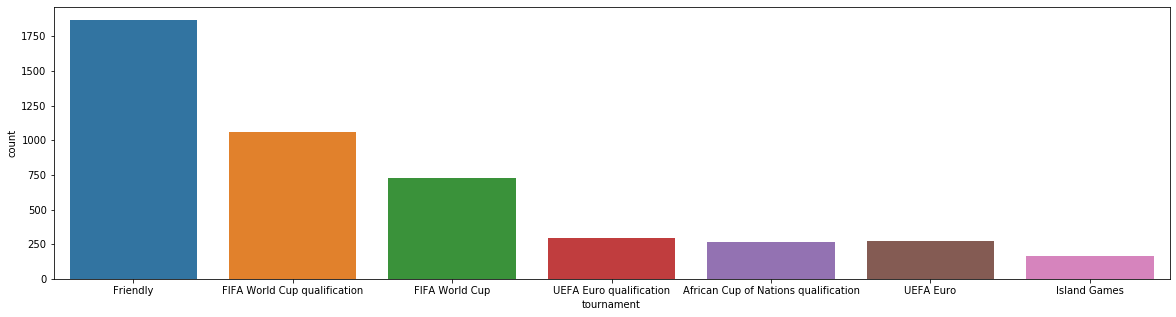

In [450]:
june = data[data["date_month"]==6]
june = june[june["tournament"].isin(june["tournament"].value_counts().head(7).index)]
plt.figure(figsize=(20,5))
sns.countplot(data=june,x="tournament")
plt.show()

6월에 다른 달보다 경기가 많은 것을 알 수 있습니다. 왜 6월에 경기가 많은지 파악하기 위해 6월의 대회를 비교했습니다. 결과를 보니 FIFA World Cup qualification과 FIFA World Cup이 있어서 다른 달보다 비교적 경기가 많은 것을 알 수 있습니다.

You can see that there is more business in June than in other months. We compared the June competition to see why there are so many games in June. The results show that the FIFA World Cup qualification and FIFA World Cup are more competitive than other months.

### 2. Home & away  analysis

홈팀과 원정팀 간의 분석을 위해 먼저 승리팀 컬럼과 , 홈팀과 원정팀중 어느팀이 승리한팀의 컬럼을 만들어 보도록 하겠습니다.

For analysis between the home team and the away team, let's start with the winning team column, and which team won the home team or away team

In [451]:
def find_win(row):
    if row["home_score"]> row["away_score"]:
        return row["home_team"]
    elif row["home_score"]< row["away_score"]:
        return row["away_team"]
    else:
        return "draw"

def find_homeaway(row):
    if row["home_team"] == row["winning_team"]:
        return "Home"
    elif row["away_team"] == row["winning_team"]:
        return "Away"
    else:
        return "Draw"

In [452]:
data["winning_team"] = data.apply(find_win,axis=1)
data["winning_team2"] = data.apply(find_homeaway,axis=1)
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_month,winning_team,winning_team2
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,draw,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3,England,Home
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,Scotland,Home
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3,draw,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,Scotland,Home


In [453]:
table = pd.pivot_table(data,index="winning_team2",values="tournament",aggfunc="count").reset_index()
P = table["tournament"].unique()

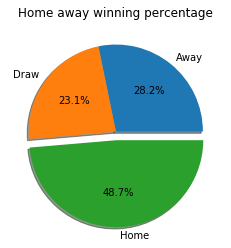

In [454]:
plt.title("Home away winning percentage")
plt.pie(P, 
        explode = (0, 0, 0.1),
        labels=["Away","Draw","Home"],
        shadow=True,
        autopct='%1.1f%%',
         )
plt.show()

홈팀의 승률이 확실이 원정팀보다 압도적인 모습을 보이고 있습니다. 무승부까지 더하면 홈팀은 70%정도 지지 않는 것을 확인할 수 있습니다.

The home team's winning percentage is definitely more overwhelming than the away team. If you add to the draw, you can see that the home team doesn't lose as much as 70 percent.

----

다음은 홈팀과 원정팀의 득점을 비교해보겠습니다. 우선 비교하기에 앞서 총 득점 컬럼을 만든후에, 보기 좋게 컬럼 순서를 정렬하도록 하겠습니다.

Next, let's compare the home team's score with the away team. Before we compare, we will create a total score column, and then arrange the column order.

In [461]:
data["total_score"] = data["home_score"] + data["away_score"]
data = data[["date","home_team","away_team","home_score","away_score","total_score","winning_team","winning_team2",
            "tournament","city","country","neutral"]]
data.head()

,date,home_team,away_team,home_score,away_score,total_score,winning_team,winning_team2,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,0,draw,Draw,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,6,England,Home,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,3,Scotland,Home,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,4,draw,Draw,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,3,Scotland,Home,Friendly,Glasgow,Scotland,False


In [462]:
home_mean = data["home_score"].mean()
away_mean = data["away_score"].mean()
print("The average score on the home team is",home_mean)
print("The average score on the away team is",away_mean)

The average score on the home team is 1.7438144710603412
The average score on the away team is 1.1849134641423964


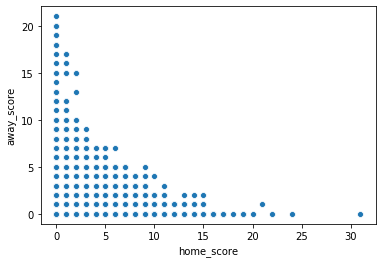

In [463]:
sns.scatterplot(x="home_score", y="away_score", data=data)
plt.show()

승률과 마찬가지로 홈팀의 득점 평균이 원정팀보다 많은 것을 알 수 있습니다. 다음은 홈 원정별 최다 득점 국가 및 최다 승 국가를 알아보겠습니다.

Just like winning percentage, you can see that the home team's scoring average is higher than the away team's. Next, we will look at the top scorers and the most wins per home away.

In [464]:
away_team = pd.DataFrame(data.groupby('away_team')['away_score'].sum().index)
away_score = pd.DataFrame(data.groupby('away_team')['away_score'].sum().values,columns=['Score'])
away_score_team=pd.concat([away_team,away_score],axis=1)
away_score_team = away_score_team.sort_values(by="Score",ascending = False).head(15)


In [465]:
home_team = pd.DataFrame(data.groupby('home_team')['home_score'].sum().index)
home_score = pd.DataFrame(data.groupby('home_team')['home_score'].sum().values,columns=['Score'])
home_score_team=pd.concat([home_team,home_score],axis=1)
home_score_team = home_score_team.sort_values(by="Score",ascending = False).head(15)

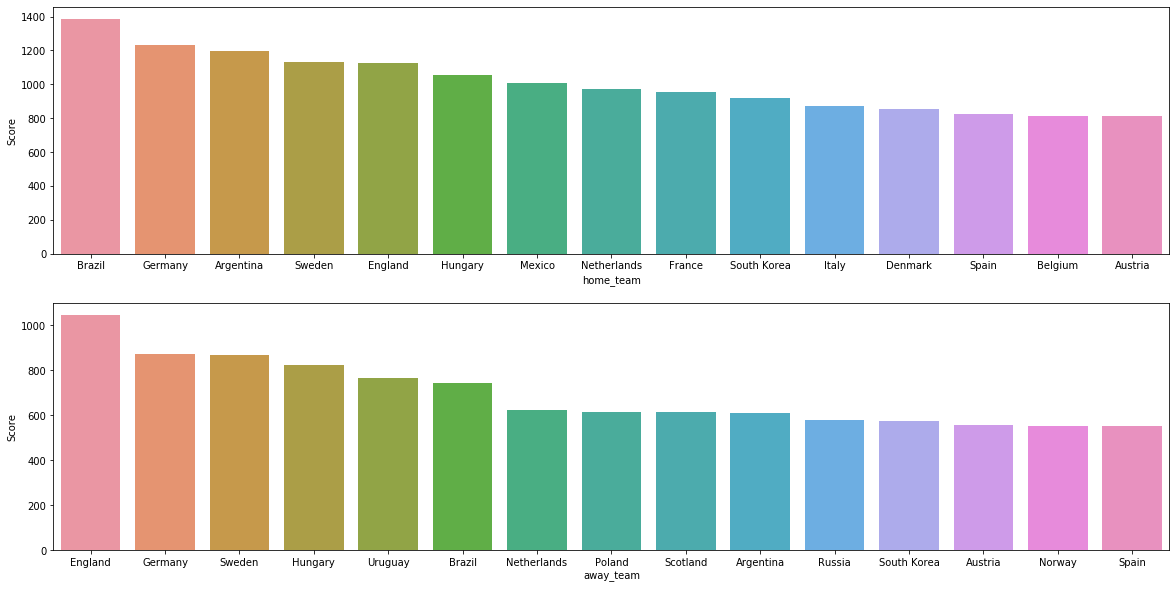

In [467]:
figure,((ax1),(ax2)) = plt.subplots(nrows=2,ncols=1)
figure.set_size_inches([20,10])
sns.barplot(data = away_score_team, x="away_team" , y="Score" , ax=ax2)
sns.barplot(data = home_score_team, x="home_team" , y="Score" , ax=ax1)
plt.show()

In [468]:
away_win = pd.DataFrame(data.groupby('away_team')['away_score'].count().values,columns=['win_count'])
home_win = pd.DataFrame(data.groupby('home_team')['home_score'].count().values,columns=['win_count'])

away_win_team=pd.concat([away_team,away_win],axis=1)
home_win_team=pd.concat([home_team,home_win],axis=1)

away_win_team = away_win_team.sort_values(by="win_count",ascending = False).head(15)
home_win_team = home_win_team.sort_values(by="win_count",ascending = False).head(15)

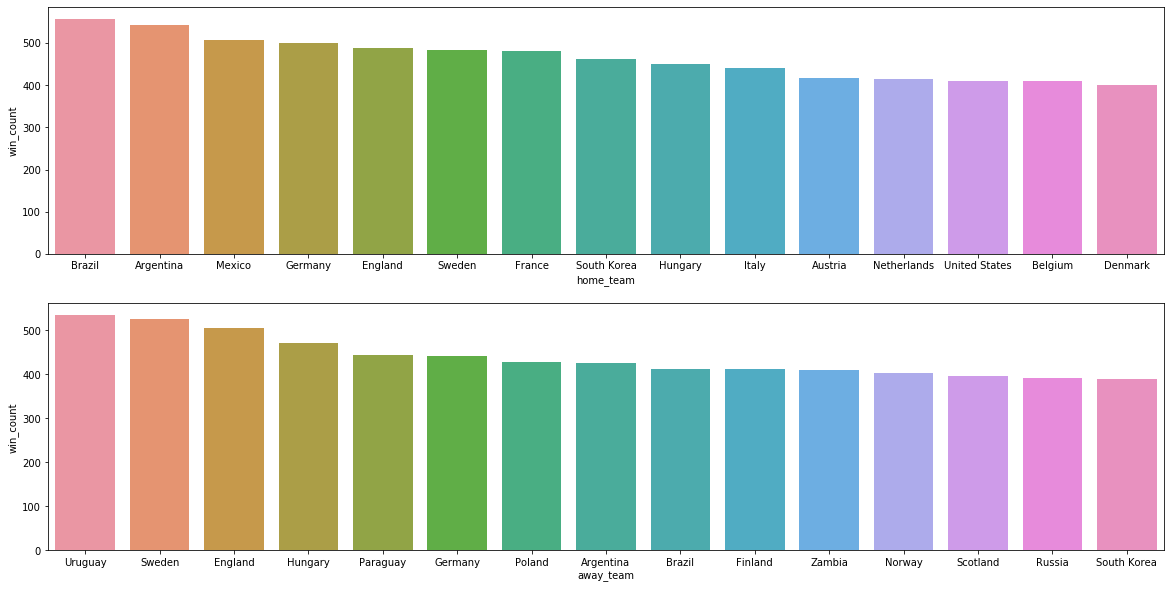

In [470]:
figure,((ax1),(ax2)) = plt.subplots(nrows=2,ncols=1)
figure.set_size_inches([20,10])

sns.barplot(data = away_win_team, x="away_team" , y="win_count" , ax=ax2)
sns.barplot(data = home_win_team, x="home_team" , y="win_count" , ax=ax1)
plt.show()

여러가지 사실을 확인할 수 있습니다. 홈에서 브라질은 최다득점, 최다승을 기록하고 있습니다. 홈에서 브라질은 최강의 팀이라고 할 수 있습니다. 한가지 눈에 띄는 사실은 한국인데요. 추측하기로는 아시아에서는 한국이 강하기 때문에 득점과 승수에서 높은 순위를 기록하고 있는 것 같습니다.

We can see a lot of facts. At home, Brazil has the most scores and the most wins. Brazil is the strongest team at home. One noticeable fact is South korea.I guess because South Korea is strong team in Asia, it ranks high in scores and wins.

### 3. FIFA World Cup analysis

In [471]:
worldcup = data[data["tournament"].isin(["FIFA World Cup"])]
print(worldcup.shape)
worldcup.head()

(900, 12)


,date,home_team,away_team,home_score,away_score,total_score,winning_team,winning_team2,tournament,city,country,neutral
1300,1930-07-13,Belgium,United States,0,3,3,United States,Away,FIFA World Cup,Montevideo,Uruguay,True
1301,1930-07-13,France,Mexico,4,1,5,France,Home,FIFA World Cup,Montevideo,Uruguay,True
1302,1930-07-14,Brazil,Yugoslavia,1,2,3,Yugoslavia,Away,FIFA World Cup,Montevideo,Uruguay,True
1303,1930-07-14,Peru,Romania,1,3,4,Romania,Away,FIFA World Cup,Montevideo,Uruguay,True
1304,1930-07-15,Argentina,France,1,0,1,Argentina,Home,FIFA World Cup,Montevideo,Uruguay,True


지역 예선을 포함하지 않은 월드컵 경기 관련 데이터는 900개 입니다. 이 데이터를 바탕으로 분석을 하겠습니다.

There are 8000 data related to World Cup competitions including regional qualification. Based on this data, I'll analyze it.

---

In [472]:
home_team = pd.DataFrame(worldcup.groupby('home_team')['home_score'].sum().index)
home_score = pd.DataFrame(worldcup.groupby('home_team')['home_score'].sum().values,columns=['score'])
home_score_team= pd.concat([home_team,home_score],axis=1)

away_team = pd.DataFrame(worldcup.groupby('away_team')['away_score'].sum().index)
away_score = pd.DataFrame(worldcup.groupby('away_team')['away_score'].sum().values,columns=['score'])
away_score_team= pd.concat([away_team,away_score],axis=1)

In [473]:
home_team = pd.DataFrame(worldcup.groupby('home_team')['winning_team'].count().index)
home_win = pd.DataFrame(worldcup.groupby('home_team')['winning_team'].count().values,columns=['win'])
home_win_team= pd.concat([home_team,home_win],axis=1)

away_team = pd.DataFrame(worldcup.groupby('away_team')['winning_team'].count().index)
away_win = pd.DataFrame(worldcup.groupby('away_team')['winning_team'].count().values,columns=['win'])
away_win_team= pd.concat([away_team,away_win],axis=1)

In [474]:
worldcup_score = home_score_team.merge(away_score_team,left_on="home_team",right_on="away_team").drop("away_team",axis=1)
worldcup_score["total_score"] = worldcup_score["score_x"] + worldcup_score["score_y"]
worldcup_score = worldcup_score.sort_values(by="total_score",ascending=False).head(15)
worldcup_score

,home_team,score_x,score_y,total_score
8,Brazil,177,52,229
27,Germany,158,68,226
2,Argentina,114,23,137
36,Italy,72,56,128
25,France,85,35,120
64,Spain,49,50,99
24,England,50,41,91
74,Uruguay,31,56,87
32,Hungary,49,38,87
42,Netherlands,42,44,86


In [475]:
worldcup_win= home_win_team.merge(away_win_team,left_on="home_team",right_on="away_team").drop("away_team",axis=1)
worldcup_win["total_win"] = worldcup_win["win_x"] + worldcup_win["win_y"]
worldcup_win = worldcup_win.sort_values(by="total_win",ascending=False).head(15)
worldcup_win

,home_team,win_x,win_y,total_win
8,Brazil,84,25,109
27,Germany,77,32,109
36,Italy,49,34,83
2,Argentina,60,21,81
24,England,36,33,69
25,France,40,26,66
64,Spain,30,33,63
40,Mexico,26,31,57
74,Uruguay,19,37,56
65,Sweden,25,26,51


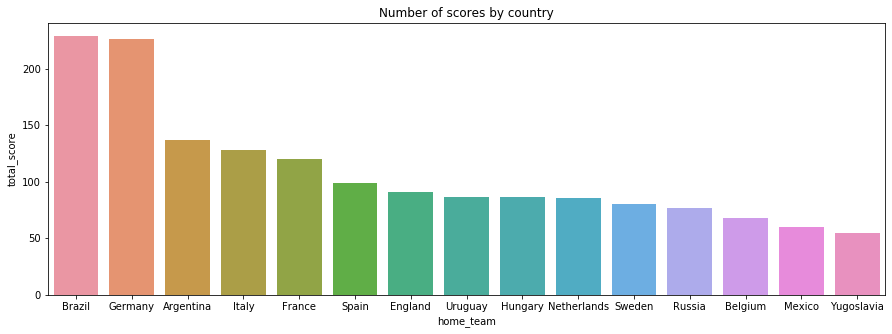

In [476]:
plt.figure(figsize=(15,5))
plt.title('Number of scores by country')
sns.barplot(data = worldcup_score , x="home_team", y="total_score")
plt.show()

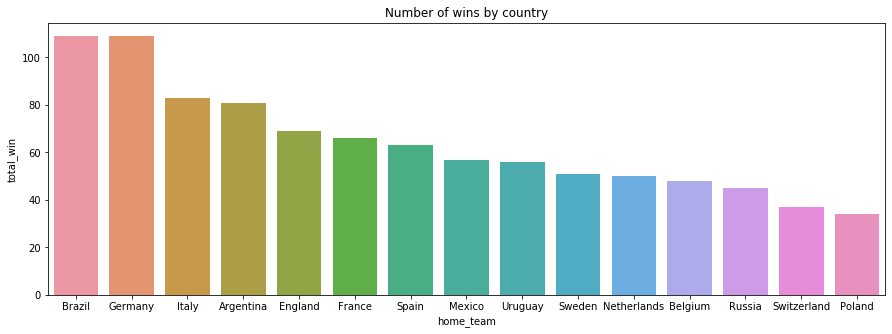

In [478]:
plt.figure(figsize=(15,5))
plt.title('Number of wins by country')
sns.barplot(data = worldcup_win , x="home_team", y="total_win")
plt.show()

In [479]:
merged = pd.merge(worldcup_win,worldcup_score)
merged = merged[["home_team","total_win","total_score"]]
merged.corr()

,total_win,total_score
total_win,1.000000,0.955655
total_score,0.955655,1.000000


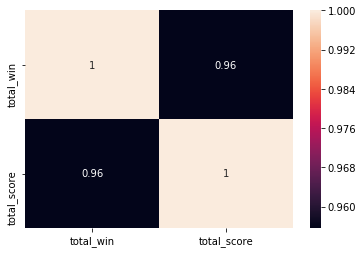

In [480]:
sns.heatmap(merged.corr(),annot=True)
plt.show()

지역 예선을 포함하지 않은 월드컵 경기에서는 홈과 원정의 구분이 경기에 영향을 덜 미칠 것으로 생각이 되기 때문에 따로 구분을 하지 않았습니다. 결과를 보면 역대 월드컵에서는 브라질, 독일, 아르헨티나 , 이탈리아, 프랑스 순으로 득점을 많이 한 것으로 나타납니다. 승리 횟수 또한 비슷한 순서임을 알 수 있습니다. 어찌보면 당연한 이야기지만 득점이 많을 수록 승리횟수 또한 늘어나는 것을 확인할 수 있습니다.

The results show that Brazil, Germany, Argentina, Italy, and France scored a lot in the past World Cup. You can see that the number of victories is in a similar order. It's a natural story, but the more points you get, the more wins you get.

### 4. Other analysis

In [481]:
tour = pd.DataFrame(data.groupby("tournament")["total_score"].mean()).reset_index().sort_values(by="total_score",ascending=False).head(10)
tour

,tournament,total_score
86,South Pacific Games,5.954545
54,GaNEFo,5.785714
100,Viva World Cup,4.821429
45,Dragon Cup,4.750000
16,CCCF Championship,4.463415
42,Copa Roca,4.347826
78,Oceania Nations Cup,4.336634
23,CONIFA World Football Cup,4.198020
59,International Cup,4.173228
12,Balkan Cup,4.137931


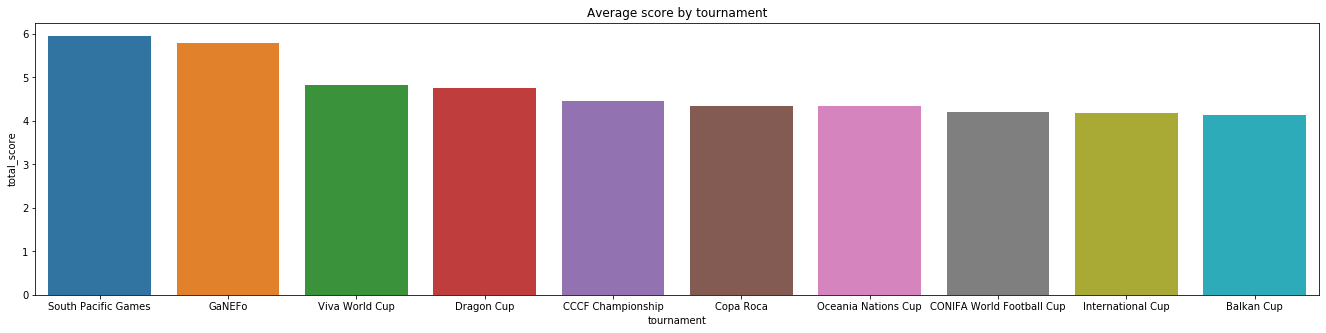

In [483]:
plt.figure(figsize=(23,5))
plt.title("Average score by tournament")
sns.barplot(data=tour,x="tournament",y="total_score")
plt.show()

In [484]:
neu = pd.DataFrame(data.groupby("neutral")["total_score"].mean()).reset_index()

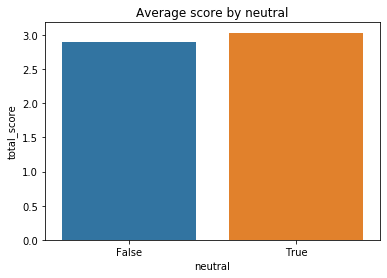

In [485]:
plt.title("Average score by neutral")
sns.barplot(data=neu,x="neutral",y="total_score")
plt.show()

In [486]:
country = pd.DataFrame(data["country"].value_counts()).head(15).reset_index()
country.columns = ["country","count"]

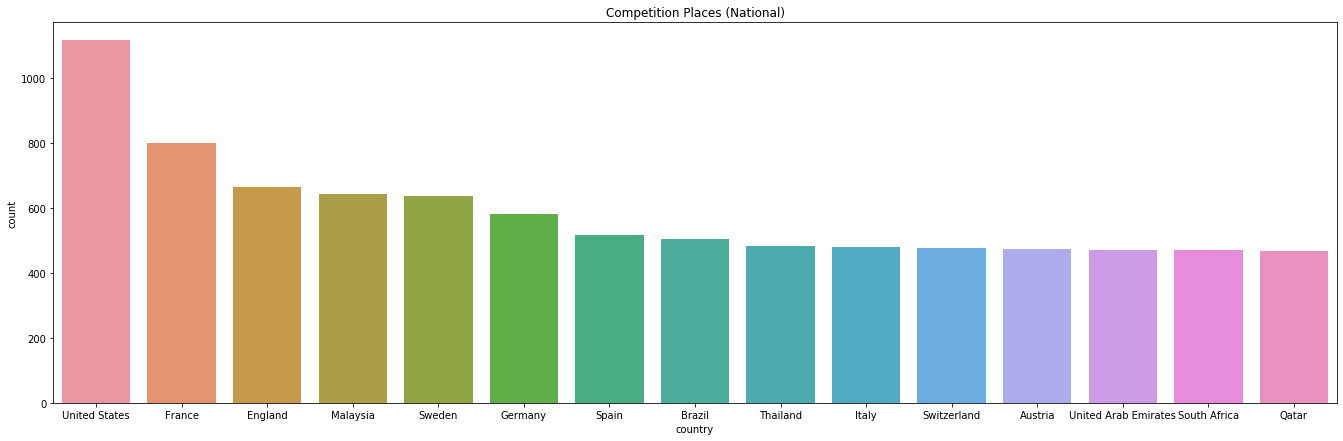

In [487]:
plt.figure(figsize=(23,7))
plt.title("Competition Places (National)")
sns.barplot(data=country,x="country",y="count")
plt.show()